In [731]:
###import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [732]:
###load the file
ds= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_June_2/main/titanic-training-data.csv")

In [733]:
ds.shape

(891, 12)

In [734]:
ds.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
687,688,0,3,"Dakic, Mr. Branko",male,19.00,0,0,349228,10.1708,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.00,1,4,347088,27.9000,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.00,1,0,SC/AH 3085,26.0000,NaN,S
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.00,0,0,C.A. 33595,15.7500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.00,0,0,C.A. 29178,13.0000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.00,0,0,111240,33.5000,B19,S


In [735]:
###drop insignificant attribute
#ds=ds.drop('PassengerId', axis=1)
#ds.head()

In [736]:
###missing value
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [737]:
ds.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [738]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [739]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Analysis

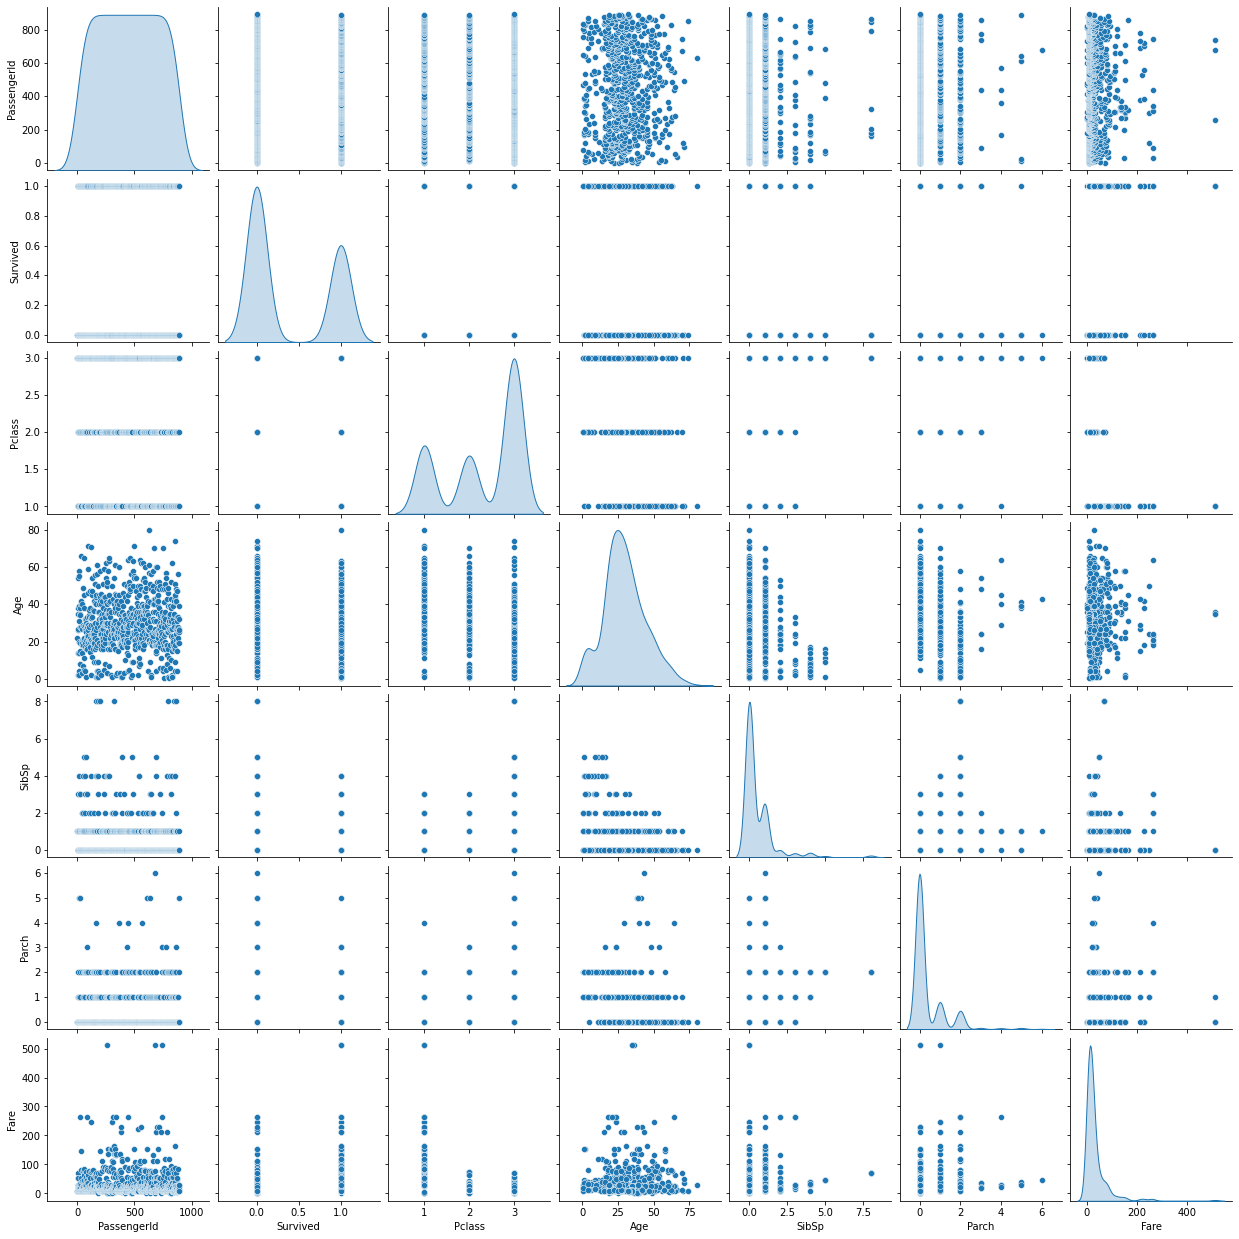

In [740]:
sns.pairplot(ds, diag_kind='kde')

<AxesSubplot:xlabel='Survived', ylabel='count'>

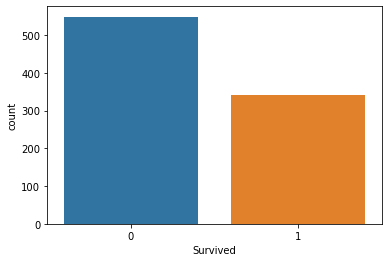

In [741]:
sns.countplot(x='Survived', data=ds)

In [742]:
ds['Survived'].sum()

342

In [743]:
ds['Survived'].count()

891

In [744]:
pd.crosstab(ds['Survived'], ds['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

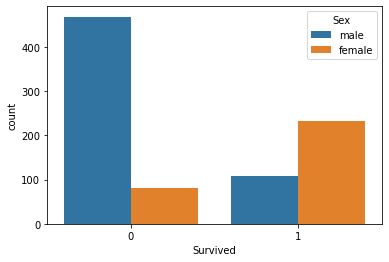

In [745]:
sns.countplot(x='Survived', hue='Sex', data=ds)

In [746]:
pd.crosstab(ds['Survived'], ds['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [747]:
pd.crosstab(ds['Survived'], ds['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<AxesSubplot:xlabel='Survived', ylabel='count'>

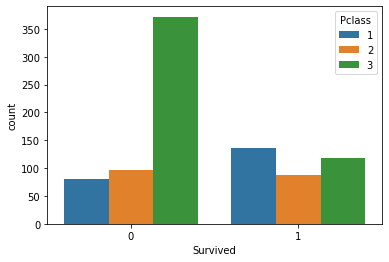

In [748]:
sns.countplot(x='Survived', hue='Pclass', data=ds)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

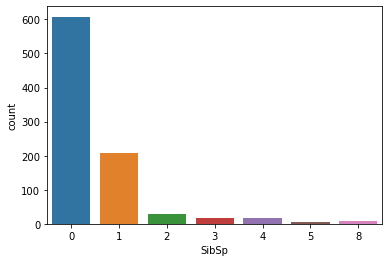

In [749]:
sns.countplot(x='SibSp', data=ds)

In [750]:
pd.crosstab(ds['Pclass'], ds['Age'])

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Pclass,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,...,3,1,2,2,0,1,0,2,0,1
2,0,1,0,2,0,2,2,3,2,1,...,1,0,0,0,1,1,0,0,0,0
3,1,0,2,0,0,5,7,3,7,3,...,0,1,0,1,0,0,1,0,1,0


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

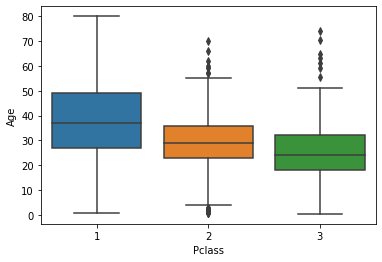

In [751]:
sns.boxplot(x='Pclass', y='Age', data=ds)

# Data Wrangling

In [752]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

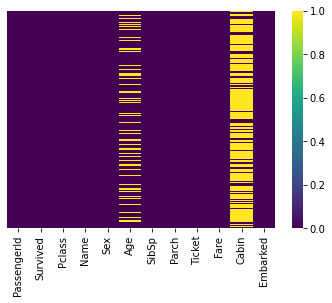

In [753]:
sns.heatmap(ds.isnull(), yticklabels=False, cmap='viridis')     ###to get missing values plot

In [754]:
#drop insignificant attribute
ds=ds.drop('PassengerId', axis=1)
ds=ds.drop('Name', axis=1)
ds=ds.drop('Ticket', axis=1)
ds=ds.drop('Fare', axis=1)
ds=ds.drop('Cabin', axis=1)
#ds.dropna(inplace=True) #use after ds.drop('Cabin', axis=1 , inplace=True) ##dropna for row

In [755]:
ds.shape

(891, 7)

In [756]:
ds.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [757]:
#one hot encoding
Sex= pd.get_dummies(ds['Sex'], drop_first= True)
Sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [758]:
embarked= pd.get_dummies(ds['Embarked'])
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [759]:
pclass= pd.get_dummies(ds['Pclass'], drop_first= True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [760]:
ds= pd.concat([ds, Sex, embarked, pclass], axis=1)
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,male,C,Q,S,2,3
0,0,3,male,22.0,1,0,S,1,0,0,1,0,1
1,1,1,female,38.0,1,0,C,0,1,0,0,0,0
2,1,3,female,26.0,0,0,S,0,0,0,1,0,1
3,1,1,female,35.0,1,0,S,0,0,0,1,0,0
4,0,3,male,35.0,0,0,S,1,0,0,1,0,1


In [761]:
ds.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)
ds.head()

,Survived,Age,SibSp,Parch,male,C,Q,S,2,3
0,0,22.0,1,0,1,0,0,1,0,1
1,1,38.0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,1,0,0,1,0,1


In [762]:
ds.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
male          uint8
C             uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

In [763]:
ds.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
male          0
C             0
Q             0
S             0
2             0
3             0
dtype: int64

In [764]:
#fill the missing values
median1= ds['Age'].median()
ds['Age']= ds['Age'].replace(np.nan, median1)

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   male      891 non-null    uint8  
 5   C         891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   2         891 non-null    uint8  
 9   3         891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(6)
memory usage: 33.2 KB


In [765]:
ds.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
male        0
C           0
Q           0
S           0
2           0
3           0
dtype: int64

In [766]:
#check for duplicate data
duplicate=ds.duplicated()
print(duplicate.sum())
ds[duplicate]

313


,Survived,Age,SibSp,Parch,male,C,Q,S,2,3
32,1,28.0,0,0,0,0,1,0,0,1
42,0,28.0,0,0,1,1,0,0,0,1
45,0,28.0,0,0,1,0,0,1,0,1
47,1,28.0,0,0,0,0,1,0,0,1
51,0,21.0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
881,0,33.0,0,0,1,0,0,1,0,1
882,0,22.0,0,0,0,0,0,1,0,1
883,0,28.0,0,0,1,0,0,1,1,0
884,0,25.0,0,0,1,0,0,1,0,1


In [767]:
#drop the duplicates
ds.drop_duplicates(inplace=True)

In [768]:
#check for duplicate data again
duplicate2= ds.duplicated()
duplicate2.sum()

0

# Handling Outliers

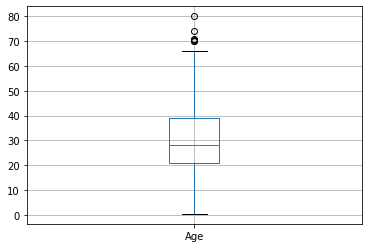

In [769]:
ds.boxplot(column=['Age'])
plt.show()

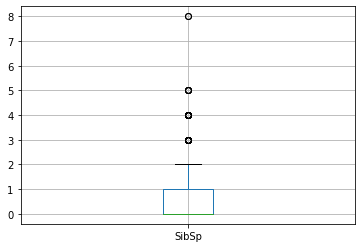

In [770]:
ds.boxplot(column=['SibSp'])
plt.show()

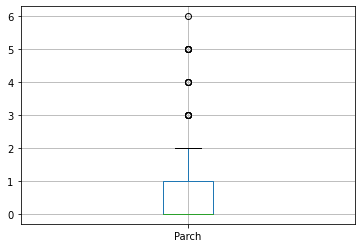

In [771]:
ds.boxplot(column=['Parch'])
plt.show()

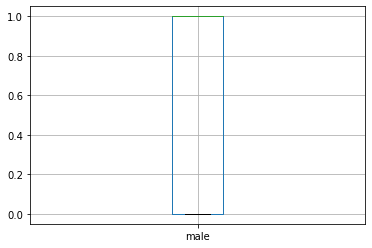

In [772]:
ds.boxplot(column=['male'])
plt.show()

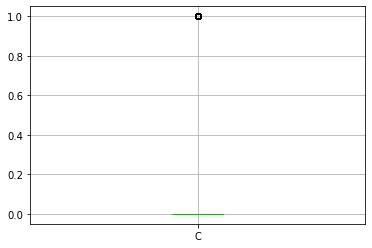

In [773]:
ds.boxplot(column=['C'])
plt.show()

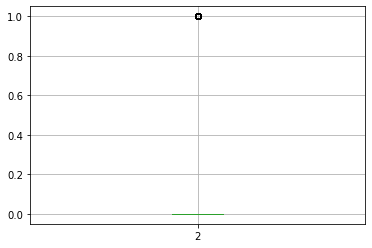

In [774]:
ds.boxplot(column=[2])
plt.show()

In [775]:
#replace the outliers using IQR
#def remove_outlier(col)
#user defined function called remove_outlier for getting the threshold value from IQR

def remove_outlier(col):
    sorted (col)
    Q1,Q3= col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1- (1.5*IQR)
    upper_range= Q3+ (1.5*IQR)
    return lower_range, upper_range

In [776]:
lowage,uppage = remove_outlier(ds['Age'])
ds['Age']= np.where(ds['Age']>uppage, uppage, ds['Age'])
ds['Age']= np.where(ds['Age']<lowage, lowage, ds['Age'])

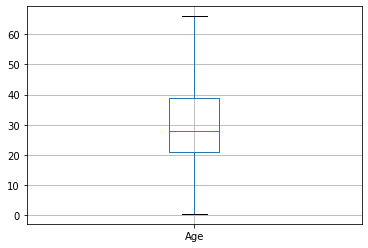

In [777]:
ds.boxplot(column=['Age'])
plt.show()

# Normalisation and Standardisation

In [778]:
ds.head()

,Survived,Age,SibSp,Parch,male,C,Q,S,2,3
0,0,22.0,1,0,1,0,0,1,0,1
1,1,38.0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,1,0,0,1,0,1


In [779]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
std_scale

StandardScaler()

In [780]:
ds['Age']= std_scale.fit_transform(ds[['Age']])
ds['SibSp']= std_scale.fit_transform(ds[['SibSp']])
ds['Parch']= std_scale.fit_transform(ds[['Parch']])
ds['male']= std_scale.fit_transform(ds[['male']])
ds['C']= std_scale.fit_transform(ds[['C']])
ds[2]= std_scale.fit_transform(ds[[2]])

In [781]:
ds.head()

,Survived,Age,SibSp,Parch,male,C,Q,S,2,3
0,0,-0.529028,0.298586,-0.600533,0.888523,-0.541355,0,1,-0.570691,1
1,1,0.543662,0.298586,-0.600533,-1.125463,1.847218,0,0,-0.570691,0
2,1,-0.260856,-0.614549,-0.600533,-1.125463,-0.541355,0,1,-0.570691,1
3,1,0.342532,0.298586,-0.600533,-1.125463,-0.541355,0,1,-0.570691,0
4,0,0.342532,-0.614549,-0.600533,0.888523,-0.541355,0,1,-0.570691,1


# Split data

In [782]:
#build linear model
#independent variables
X= ds.drop(['Survived'], axis=1)

#dependent variables
y= ds[['Survived']]

In [783]:
#split X and y into training and testing set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit logistic Model

In [784]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [785]:
#coefficients of variable and intercept
model.score(X_train, y_train)

0.7673267326732673

In [786]:
#out of sample score
model.score(X_test, y_test)

0.7068965517241379

In [787]:
predictions= model.predict(X_test)

In [788]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7068965517241379

In [789]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70        89
           1       0.68      0.75      0.72        85

    accuracy                           0.71       174
   macro avg       0.71      0.71      0.71       174
weighted avg       0.71      0.71      0.71       174



In [790]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[59, 30],
       [21, 64]])

<AxesSubplot:>

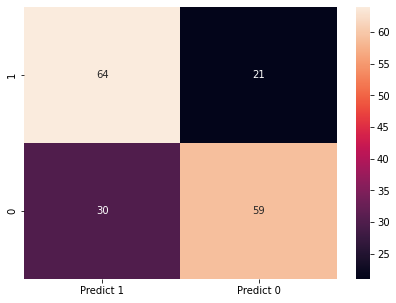

In [791]:
cm= metrics.confusion_matrix(y_test, predictions, labels=[1,0])

ds_cm= pd.DataFrame(cm,index= [i for i in ["1","0"]], columns = [i for i in["Predict 1", "Predict 0"]])
plt.figure(figsize= (7,5))
sns.heatmap(ds_cm, annot=True, fmt='g')

In [792]:
from sklearn.svm import SVC

In [793]:
svc_model= SVC(C=5, gamma=0.15, kernel='rbf' )
svc_model.fit(X_train, y_train)

SVC(C=5, gamma=0.15)

In [794]:
svc_model.score(X_train, y_train)

0.8217821782178217

In [795]:
svc_model.score(X_test, y_test)

0.7586206896551724